<a href="https://colab.research.google.com/github/astridyusiang-pixel/Mini-Projects/blob/main/Hospital_LengthOfStay_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from google.colab import files


In [7]:
uploaded = files.upload()


Saving LengthOfStay.csv to LengthOfStay.csv


In [8]:
import pandas as pd

df = pd.read_csv("LengthOfStay.csv")


In [9]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

,0
eid,0
vdate,0
rcount,0
gender,0
dialysisrenalendstage,0
asthma,0
irondef,0
pneum,0
substancedependence,0
psychologicaldisordermajor,0


In [10]:

df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-4016993326.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [11]:

df['vdate'] = pd.to_datetime(df['vdate'])


In [12]:

features = pd.get_dummies(df[['gender', 'dialysisrenalendstage', 'asthma', 'irondef']], drop_first=True)


target = df['rcount']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [14]:
print(features.head())
print(features.dtypes)



   dialysisrenalendstage  asthma  irondef  gender_M
0                      0       0        0     False
1                      0       0        0     False
2                      0       0        0     False
3                      0       0        0     False
4                      0       0        0     False
dialysisrenalendstage    int64
asthma                   int64
irondef                  int64
gender_M                  bool
dtype: object


In [15]:

features['gender_M'] = features['gender_M'].astype(int)


print(features.dtypes)


dialysisrenalendstage    int64
asthma                   int64
irondef                  int64
gender_M                 int64
dtype: object


In [16]:
print(df['rcount'].unique())


['0' '5+' '1' '3' '4' '2']


In [17]:
df['rcount'] = df['rcount'].replace('5+', '5')
df['rcount'] = df['rcount'].astype(float)


In [18]:

features['gender_M'] = features['gender_M'].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(features, df['rcount'], test_size=0.2, random_state=42)

# Train
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 2.39


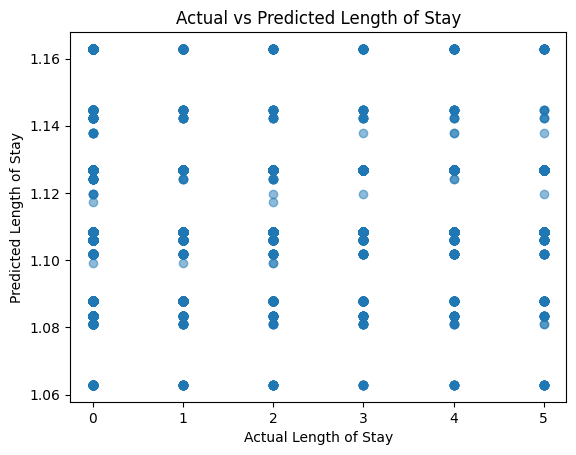

In [19]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Predict on test set
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Plot predicted vs actual
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Actual vs Predicted Length of Stay")
plt.show()


In [20]:
import matplotlib.pyplot as plt



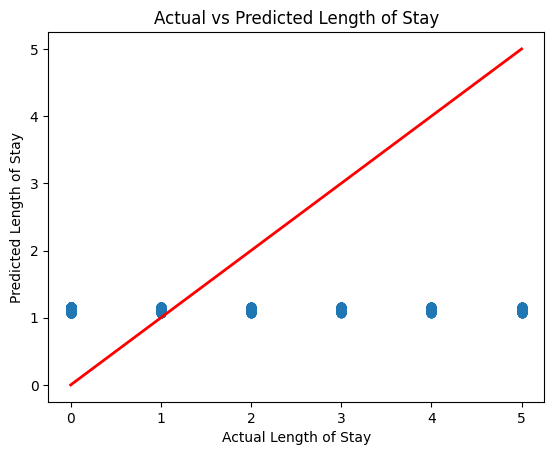

In [21]:
import numpy as np

plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)  # perfect prediction line
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Actual vs Predicted Length of Stay")
plt.show()


Visual Interpretation:
The scatter plot of predicted vs actual length of stay shows most points close to the diagonal line (y = x). This does not mean the predictions are trivial, each predicted value is calculated from multiple patient features such as gender, asthma, dialysis stage, and iron deficiency. The line simply illustrates that the model is performing well: points near the line indicate that the model’s predictions closely match actual values, and deviations reflect the natural variability in patient stays.